In [8]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import CalculatedFieldSubroutines as cfs

from pandasgui import show

import warnings

In [9]:
warnings.filterwarnings( 'ignore' )

In [61]:
#

In [10]:
gmID_df = pd.read_csv( '/home/rcoldren_linux/Desktop/Data/groupMetadataID_list_updated.csv' )

In [11]:
gmID_list = gmID_df[ 'groupMetadataID' ].tolist()

In [12]:
desktop_path = '/home/rcoldren_linux/Desktop'

In [13]:
topic = '/apollo/canbus/chassis'

dir_friendly_topic = topic.replace( '/', '_' )

chassis_dfs = []

for gmID in gmID_list:

    csv_name = gmID + dir_friendly_topic

    temp_df = pd.read_csv( f'{ desktop_path }/Raw_Data/{ gmID }/{ dir_friendly_topic }/{ csv_name }.csv' )

    temp_df = temp_df.sort_values( 'time' )

    chassis_dfs.append( temp_df )

In [14]:
for index, df in enumerate( chassis_dfs ):

    df = df[ [ 'time', 'groupMetadataID', 'drivingMode', 'speedMps', 'throttlePercentage', 'steeringPercentage', 'brakePercentage',
              'signal.turnSignal' ] ]

    chassis_dfs[ index ] = df

In [15]:
topic = '/apollo/sensor/gnss/best_pose'

dir_friendly_topic = topic.replace( '/', '_' )

best_pose_dfs = []

for gmID in gmID_list:

    csv_name = gmID + dir_friendly_topic

    temp_df = pd.read_csv( f'{ desktop_path }/Raw_Data/{ gmID }/{ dir_friendly_topic }/{ csv_name }.csv' )

    temp_df = temp_df.sort_values( 'time' )

    best_pose_dfs.append( temp_df )

In [16]:
for index, df in enumerate( best_pose_dfs ):

    df = df[ [ 'time', 'groupMetadataID', 'latitude', 'longitude', 'latitudeStdDev', 'longitudeStdDev', 'numSatsInSolution' ] ]

    best_pose_dfs[ index ] = df

In [62]:
#

In [17]:
for chassis_df, best_pose_df in zip( chassis_dfs, best_pose_dfs ):

    cfs.ChassisBestPoseMatchedTime( chassis_df, best_pose_df )

In [18]:
for df in chassis_dfs:

    cfs.BinaryDrivingMode( df )

    cfs.TernaryDrivingModeTransition( df )

In [19]:
for df in best_pose_dfs:

    cfs.LatLonTotalStdDev( df )

In [63]:
#

In [20]:
merged_chassis_best_pose_dfs = []

for chassis_df, best_pose_df in zip( chassis_dfs, best_pose_dfs ):

    merged_chassis_best_pose_df = pd.merge( chassis_df, best_pose_df, on = 'ChassisBestPoseMatchedTime', how = 'inner' )

    merged_chassis_best_pose_dfs.append( merged_chassis_best_pose_df )

In [21]:
all_merged_chassis_best_pose_dfs = pd.concat( merged_chassis_best_pose_dfs )

In [64]:
#

In [22]:
manual_df = all_merged_chassis_best_pose_dfs[ all_merged_chassis_best_pose_dfs[ 'BinaryDrivingMode'] == 0 ]

automatic_df = all_merged_chassis_best_pose_dfs[ all_merged_chassis_best_pose_dfs[ 'BinaryDrivingMode'] == 1 ]

disengagements_df = all_merged_chassis_best_pose_dfs[ all_merged_chassis_best_pose_dfs[ 'TernaryDrivingModeTransition' ] == -1 ]

reengagements_df = all_merged_chassis_best_pose_dfs[ all_merged_chassis_best_pose_dfs[ 'TernaryDrivingModeTransition' ] == 1 ]

In [65]:
#

In [24]:
all_latlontotalstddev_array = np.array( all_merged_chassis_best_pose_dfs[ 'LatLonTotalStdDev' ] )

manual_latlontotalstddev_array = np.array( manual_df[ 'LatLonTotalStdDev' ] )

automatic_latlontotalstddev_array = np.array( automatic_df[ 'LatLonTotalStdDev' ] )

disengagements_latlontotalstddev_array = np.array( disengagements_df[ 'LatLonTotalStdDev' ] )

reengagements_latlontotalstddev_array = np.array( reengagements_df[ 'LatLonTotalStdDev' ] )

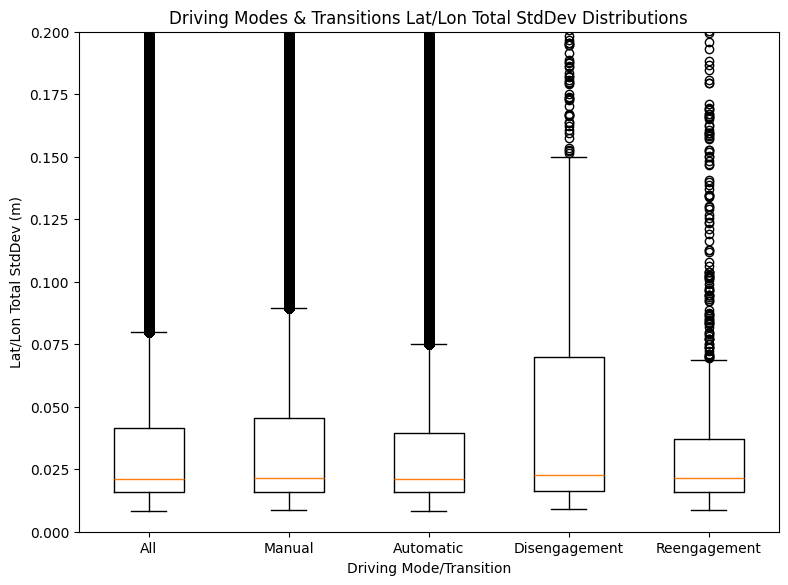

In [25]:
fig = plt.figure( figsize = ( 7, 5 ) )

ax = fig.add_axes( [ 0, 0, 1, 1 ] )

bp = ax.boxplot( [ all_latlontotalstddev_array, manual_latlontotalstddev_array, automatic_latlontotalstddev_array, 
                  disengagements_latlontotalstddev_array, reengagements_latlontotalstddev_array ],
                 tick_labels = [ 'All', 'Manual', 'Automatic', 'Disengagement', 'Reengagement' ] )

ax.set_ylim( 0, 0.2 )

ax.set_xlabel( 'Driving Mode/Transition' )

ax.set_ylabel( 'Lat/Lon Total StdDev (m)' )

ax.set_title( 'Driving Modes & Transitions Lat/Lon Total StdDev Distributions' )

plt.show()

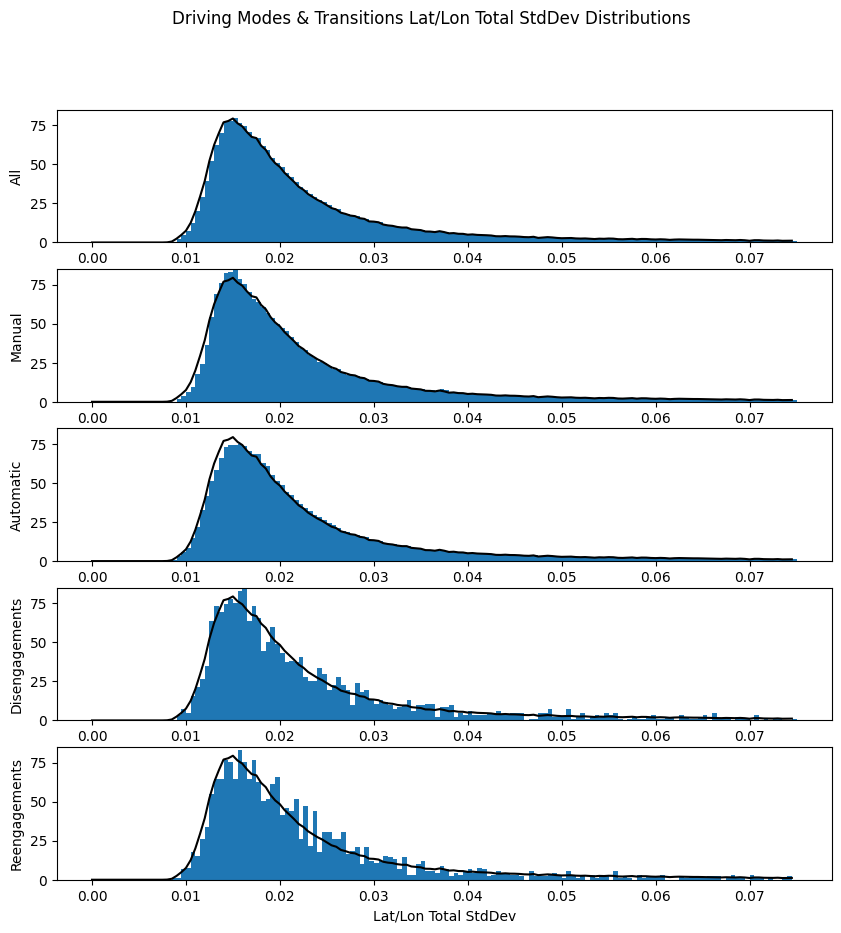

In [26]:
fig, ( ax1, ax2, ax3, ax4, ax5 ) = plt.subplots( 5 )

fig.suptitle( 'Driving Modes & Transitions Lat/Lon Total StdDev Distributions' )


y, x, z = ax1.hist( all_latlontotalstddev_array, bins = 150, range = ( 0, 0.075 ), density = True )

ax1.plot( x[ 0 : -1 ], y, color = 'k' )

ax1.set_ylim( 0, 85 )

ax1.set_ylabel( 'All' )


ax2.hist( manual_latlontotalstddev_array, bins = 150, range = ( 0, 0.075 ), density = True )

ax2.plot( x[ 0 : -1 ], y, color = 'k' )

ax2.set_ylim( 0, 85 )

ax2.set_ylabel( 'Manual' )


ax3.hist( automatic_latlontotalstddev_array, bins = 150, range = ( 0, 0.075 ), density = True )

ax3.plot( x[ 0 : -1 ], y, color = 'k' )

ax3.set_ylim( 0, 85 )

ax3.set_ylabel( 'Automatic' )


ax4.hist( disengagements_latlontotalstddev_array, bins = 150, range = ( 0, 0.075 ), density = True )

ax4.plot( x[ 0 : -1 ], y, color = 'k' )

ax4.set_ylim( 0, 85 )

ax4.set_ylabel( 'Disengagements' )


ax5.hist( reengagements_latlontotalstddev_array, bins = 150, range = ( 0, 0.075 ), density = True )

ax5.plot( x[ 0 : -1 ], y, color = 'k' )

ax5.set_ylim( 0, 85 )

ax5.set_ylabel( 'Reengagements' )

ax5.set_xlabel( 'Lat/Lon Total StdDev' )


fig.set_figheight( 10 )

fig.set_figwidth( 10 )

plt.show()

In [66]:
#

In [27]:
all_numSatsInSolution_array = np.array( all_merged_chassis_best_pose_dfs[ 'numSatsInSolution' ] )

manual_numSatsInSolution_array = np.array( manual_df[ 'numSatsInSolution' ] )

automatic_numSatsInSolution_array = np.array( automatic_df[ 'numSatsInSolution' ] )

disengagements_numSatsInSolution_array = np.array( disengagements_df[ 'numSatsInSolution' ] )

reengagements_numSatsInSolution_array = np.array( reengagements_df[ 'numSatsInSolution' ] )

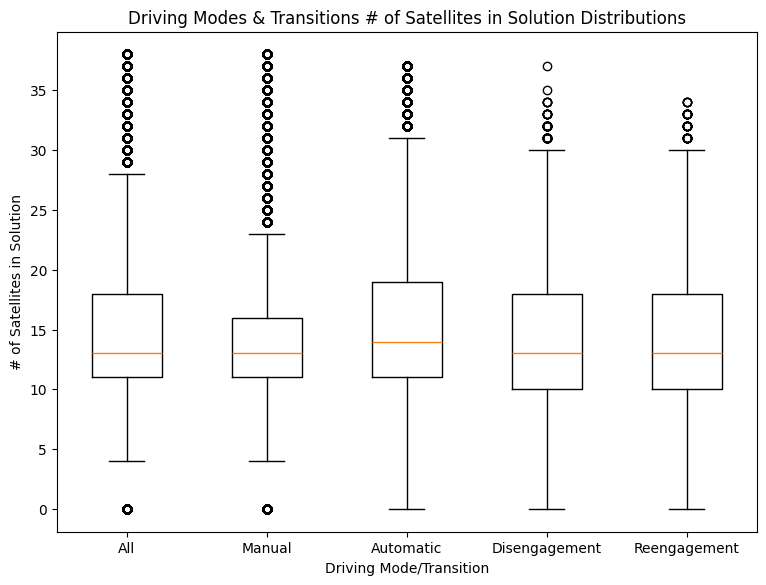

In [28]:
fig = plt.figure( figsize = ( 7, 5 ) )

ax = fig.add_axes( [ 0, 0, 1, 1 ] )

bp = ax.boxplot( [ all_numSatsInSolution_array, manual_numSatsInSolution_array, automatic_numSatsInSolution_array, 
                  disengagements_numSatsInSolution_array, reengagements_numSatsInSolution_array ],
                 tick_labels = [ 'All', 'Manual', 'Automatic', 'Disengagement', 'Reengagement' ] )

#ax.set_ylim( 0, 0.2 )

ax.set_xlabel( 'Driving Mode/Transition' )

ax.set_ylabel( '# of Satellites in Solution' )

ax.set_title( 'Driving Modes & Transitions # of Satellites in Solution Distributions' )

plt.show()

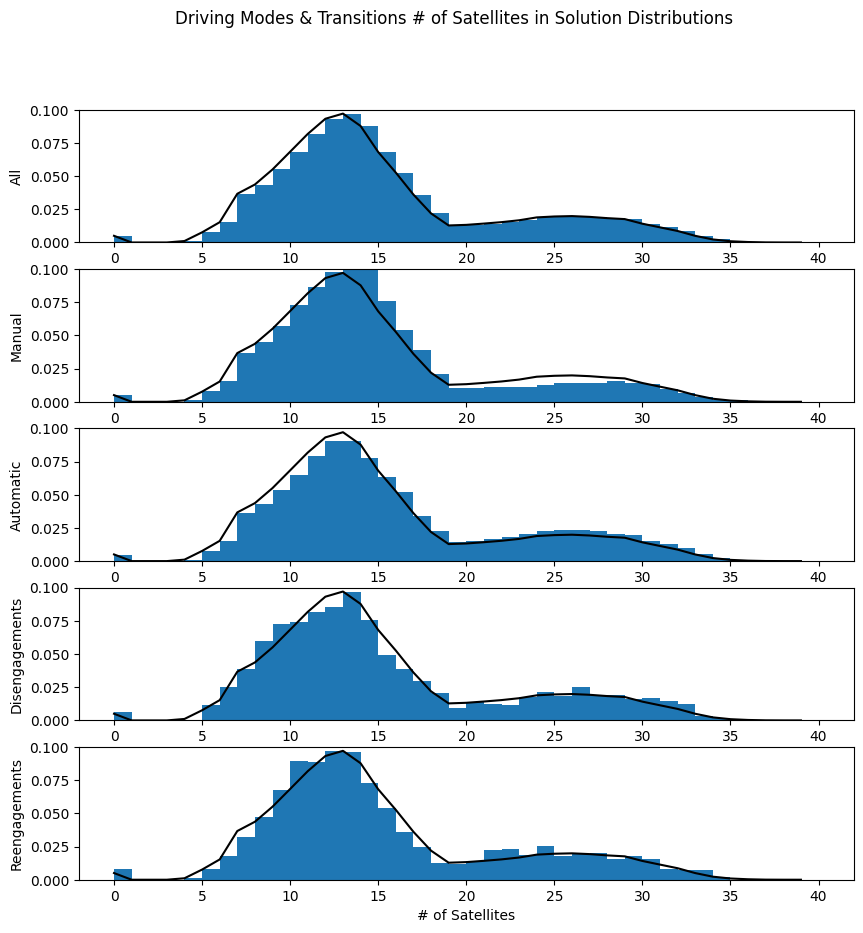

In [29]:
fig, ( ax1, ax2, ax3, ax4, ax5 ) = plt.subplots( 5 )

fig.suptitle( 'Driving Modes & Transitions # of Satellites in Solution Distributions' )


y, x, z = ax1.hist( all_numSatsInSolution_array, bins = 40, range = ( 0, 40 ), density = True )

ax1.plot( x[ 0 : -1 ], y, color = 'k' )

ax1.set_ylim( 0, 0.1 )

ax1.set_ylabel( 'All' )


ax2.hist( manual_numSatsInSolution_array, bins = 40, range = ( 0, 40 ), density = True )

ax2.plot( x[ 0 : -1 ], y, color = 'k' )

ax2.set_ylim( 0, 0.1 )

ax2.set_ylabel( 'Manual' )


ax3.hist( automatic_numSatsInSolution_array, bins = 40, range = ( 0, 40 ), density = True )

ax3.plot( x[ 0 : -1 ], y, color = 'k' )

ax3.set_ylim( 0, 0.1 )

ax3.set_ylabel( 'Automatic' )


ax4.hist( disengagements_numSatsInSolution_array, bins = 40, range = ( 0, 40 ), density = True )

ax4.plot( x[ 0 : -1 ], y, color = 'k' )

ax4.set_ylim( 0, 0.1 )

ax4.set_ylabel( 'Disengagements' )


ax5.hist( reengagements_numSatsInSolution_array, bins = 40, range = ( 0, 40 ), density = True )

ax5.plot( x[ 0 : -1 ], y, color = 'k' )

ax5.set_ylim( 0, 0.1 )

ax5.set_ylabel( 'Reengagements' )

ax5.set_xlabel( '# of Satellites' )


fig.set_figheight( 10 )

fig.set_figwidth( 10 )

plt.show()

In [67]:
#

In [34]:
all_best_pose_df = pd.concat( best_pose_dfs )

In [36]:
all_best_pose_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446511 entries, 838 to 780
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   time                        446511 non-null  int64  
 1   groupMetadataID             446511 non-null  object 
 2   latitude                    446511 non-null  float64
 3   longitude                   446511 non-null  float64
 4   latitudeStdDev              446511 non-null  float64
 5   longitudeStdDev             446511 non-null  float64
 6   numSatsInSolution           446511 non-null  int64  
 7   ChassisBestPoseMatchedTime  446511 non-null  int64  
 8   LatLonTotalStdDev           446511 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 34.1+ MB


In [55]:
numSatsInSolution_array = np.array( all_best_pose_df[ 'numSatsInSolution' ] )

LatLonTotalStdDev_array = np.array( all_best_pose_df[ 'LatLonTotalStdDev' ] )

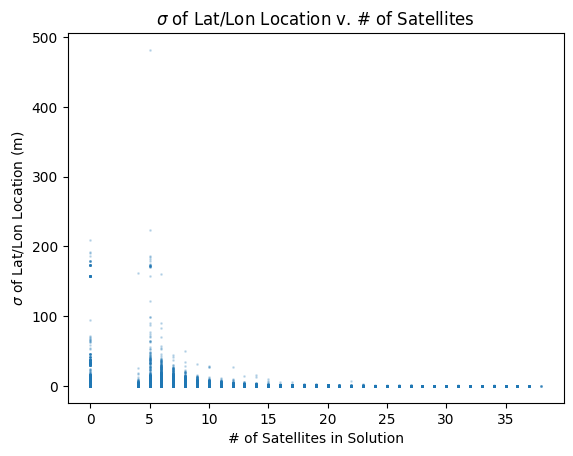

In [56]:
plt.plot( numSatsInSolution_array, LatLonTotalStdDev_array, marker = '.', ls = '', ms = '2', alpha = 1 / 5 )

plt.xlabel( '# of Satellites in Solution' )

plt.ylabel( '$\sigma$ of Lat/Lon Location (m)' )

plt.title( '$\sigma$ of Lat/Lon Location v. # of Satellites' )

plt.show()

In [57]:
group_by_numsat = all_best_pose_df.groupby( 'numSatsInSolution' )

group_by_numsat_metrics_df = group_by_numsat.agg( { 'LatLonTotalStdDev': [ 'mean', 'median', 'max', 'count' ] } )

group_by_numsat_metrics_df.reset_index( inplace = True )

In [58]:
group_by_numsat_metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   (numSatsInSolution, )        36 non-null     int64  
 1   (LatLonTotalStdDev, mean)    36 non-null     float64
 2   (LatLonTotalStdDev, median)  36 non-null     float64
 3   (LatLonTotalStdDev, max)     36 non-null     float64
 4   (LatLonTotalStdDev, count)   36 non-null     int64  
dtypes: float64(3), int64(2)
memory usage: 1.5 KB


In [59]:
numSatsInSolution_array = np.array( group_by_numsat_metrics_df[ 'numSatsInSolution' ] )

LatLonTotalStdDev_mean_array = np.array( group_by_numsat_metrics_df[ 'LatLonTotalStdDev', 'mean' ] )

LatLonTotalStdDev_median_array = np.array( group_by_numsat_metrics_df[ 'LatLonTotalStdDev', 'median' ] )

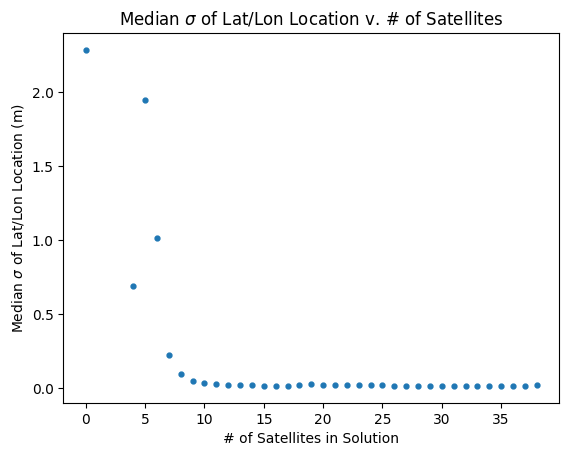

In [60]:
plt.plot( numSatsInSolution_array, LatLonTotalStdDev_median_array, marker = '.', ls = '', ms = 7 )

plt.xlabel( '# of Satellites in Solution' )

plt.ylabel( 'Median $\sigma$ of Lat/Lon Location (m)' )

plt.title( 'Median $\sigma$ of Lat/Lon Location v. # of Satellites' )

plt.show()